In [27]:
# import dependencies
from pprint import pprint
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [28]:
# load amzn data and format
amzn_raw_df = pd.read_csv('Resources/amzn_stock_data_raw.csv')
amzn_df = amzn_raw_df[['t','n','v','vw','o','c','h','l']].rename(columns={'v':'volume',\
                                                            'vw':'volume weighted average price',\
                                                            'o':'open', 'c':'close',\
                                                            'h':'high', 'l':'low',\
                                                            't':'Date','n':'transaction count'})
amzn_df.sort_values('Date', ascending=True, inplace=True)
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'], origin='unix', unit='ms').dt.date

# displaying amzn_df
amzn_df.head()

,Date,transaction count,volume,volume weighted average price,open,close,high,low
0,2020-01-02,102920,4035910.0,1882.8283,1875.00,1898.01,1898.0100,1864.1500
1,2020-01-03,99633,3766604.0,1875.4284,1864.50,1874.97,1886.1965,1864.5000
2,2020-01-06,104160,4065698.0,1891.9954,1860.00,1902.88,1903.6900,1860.0000
3,2020-01-07,98636,4134010.0,1903.2183,1904.50,1906.86,1913.8900,1892.0433
4,2020-01-08,95706,3511966.0,1900.4983,1898.04,1891.97,1910.9999,1886.4448


In [29]:
# load covid data, format date and sort
us_covid_raw_df = pd.read_csv('../Covid/US_covid.csv')
us_covid_raw_df['Date'] = pd.to_datetime(us_covid_raw_df['Date']).dt.date
us_covid_raw_df.sort_values('Date', ascending=True)
us_covid_raw_df.head()


,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
0,2020-01-03,United States of America,0,0,0,0
1,2020-01-04,United States of America,0,0,0,0
2,2020-01-05,United States of America,0,0,0,0
3,2020-01-06,United States of America,0,0,0,0
4,2020-01-07,United States of America,0,0,0,0


In [30]:
# saving dfs to csv files for team use
# us_covid_raw_df.to_csv('test/covid.csv')
# amzn_df.to_csv('test/amzn.csv')

In [31]:
### testing for date format matching before merge
# covidraw index 0 is 2022-01-03
print(us_covid_raw_df.iloc[0,0])
print(type(us_covid_raw_df.iloc[0,0]))

# amzn index 1 is 2022-01-03
print(amzn_df.iloc[1,0])
print(type(amzn_df.iloc[1,0]))

2020-01-03
<class 'datetime.date'>
2020-01-03
<class 'datetime.date'>


In [32]:
# merging data on date
all_dates_df = pd.merge(us_covid_raw_df, amzn_df, how='inner', on='Date')
all_dates_df.head()

# saving new dfs to csvs for team
# all_dates_df.to_csv('Resources/all_dates_combined.csv')

,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,transaction count,volume,volume weighted average price,open,close,high,low
0,2020-01-03,United States of America,0,0,0,0,99633,3766604.0,1875.4284,1864.50,1874.97,1886.1965,1864.5000
1,2020-01-06,United States of America,0,0,0,0,104160,4065698.0,1891.9954,1860.00,1902.88,1903.6900,1860.0000
2,2020-01-07,United States of America,0,0,0,0,98636,4134010.0,1903.2183,1904.50,1906.86,1913.8900,1892.0433
3,2020-01-08,United States of America,0,0,0,0,95706,3511966.0,1900.4983,1898.04,1891.97,1910.9999,1886.4448
4,2020-01-09,United States of America,0,0,0,0,84377,3174962.0,1906.0261,1909.89,1901.05,1917.8200,1895.8038


In [33]:
volume_df = all_dates_df.loc[:,['Date','New Cases','New Deaths','volume']]

# adding columns for 1 month to 12 month stock performance offsets, accounting for the lag of stock parameters changing due to covid parameters
# this is useful becuase news agencies couldn't report covid stats instantaneously. There had to be some lag
# also will add 1 week, 2 week, and 3 week lag columns
volume_df["1_week_future_vol"] = pd.Series([], dtype=float)
volume_df["2_week_future_vol"] = pd.Series([], dtype=float)
volume_df["3_week_future_vol"] = pd.Series([], dtype=float)
volume_df["1_month_future_vol"] = pd.Series([], dtype=float)
volume_df["2_month_future_vol"] = pd.Series([], dtype=float)
volume_df["3_month_future_vol"] = pd.Series([], dtype=float)
volume_df["4_month_future_vol"] = pd.Series([], dtype=float)
volume_df["5_month_future_vol"] = pd.Series([], dtype=float)
volume_df["6_month_future_vol"] = pd.Series([], dtype=float)
volume_df["7_month_future_vol"] = pd.Series([], dtype=float)
volume_df["8_month_future_vol"] = pd.Series([], dtype=float)
volume_df["9_month_future_vol"] = pd.Series([], dtype=float)
volume_df["10_month_future_vol"] = pd.Series([], dtype=float)
volume_df["11_month_future_vol"] = pd.Series([], dtype=float)
volume_df["12_month_future_vol"] = pd.Series([], dtype=float)

volume_df.head()

,Date,New Cases,New Deaths,volume,1_week_future_vol,2_week_future_vol,3_week_future_vol,1_month_future_vol,2_month_future_vol,3_month_future_vol,4_month_future_vol,5_month_future_vol,6_month_future_vol,7_month_future_vol,8_month_future_vol,9_month_future_vol,10_month_future_vol,11_month_future_vol,12_month_future_vol
0,2020-01-03,0,0,3766604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-06,0,0,4065698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,0,0,4134010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08,0,0,3511966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-09,0,0,3174962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
price_df = all_dates_df.loc[:,['Date','New Cases','New Deaths','volume weighted average price']]

# adding columns for 1 month to 12 month stock performance offsets, accounting for the lag of stock parameters changing due to covid parameters
# this is useful becuase news agencies couldn't report covid stats instantaneously. There had to be some lag
# also will add 1 week, 2 week, and 3 week lag columns
price_df["1_week_future_price"] = pd.Series([], dtype=float)
price_df["2_week_future_price"] = pd.Series([], dtype=float)
price_df["3_week_future_price"] = pd.Series([], dtype=float)
price_df["1_month_future_price"] = pd.Series([], dtype=float)
price_df["2_month_future_price"] = pd.Series([], dtype=float)
price_df["3_month_future_price"] = pd.Series([], dtype=float)
price_df["4_month_future_price"] = pd.Series([], dtype=float)
price_df["5_month_future_price"] = pd.Series([], dtype=float)
price_df["6_month_future_price"] = pd.Series([], dtype=float)
price_df["7_month_future_price"] = pd.Series([], dtype=float)
price_df["8_month_future_price"] = pd.Series([], dtype=float)
price_df["9_month_future_price"] = pd.Series([], dtype=float)
price_df["10_month_future_price"] = pd.Series([], dtype=float)
price_df["11_month_future_price"] = pd.Series([], dtype=float)
price_df["12_month_future_price"] = pd.Series([], dtype=float)

price_df.head()

,Date,New Cases,New Deaths,volume weighted average price,1_week_future_price,2_week_future_price,3_week_future_price,1_month_future_price,2_month_future_price,3_month_future_price,4_month_future_price,5_month_future_price,6_month_future_price,7_month_future_price,8_month_future_price,9_month_future_price,10_month_future_price,11_month_future_price,12_month_future_price
0,2020-01-03,0,0,1875.4284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-06,0,0,1891.9954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,0,0,1903.2183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08,0,0,1900.4983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-09,0,0,1906.0261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# getting offset volume and price data into dfs

# setting offsets in # of business days
offset_list = [5,10,15,22,44,66,88,110,132,154,176,198,220,242,264]

start_column = 4
for index, value in volume_df.iterrows():
    try:
        for offset in offset_list:
            volume_df.iloc[index,start_column+offset_list.index(offset)] = volume_df.iloc[index+offset,3]
    except:
        pass

for index, value in price_df.iterrows():
    try:
        for offset in offset_list:
            price_df.iloc[index,start_column+offset_list.index(offset)] = price_df.iloc[index+offset,3]
    except:
        pass

# print("volume_df:\n",volume_df.head())
# print("\n\nprice_df:\n",price_df.head())

In [36]:
# getting only dates with new reported cases/deaths
filtered_volume_df = volume_df.loc[volume_df["New Cases"] != 0]
filtered_price_df = price_df.loc[price_df["New Cases"] != 0]

In [37]:
### saving filtered dfs to csv files
filtered_volume_df.to_csv('Resources/amzn_volumes.csv')
filtered_price_df.to_csv('Resources/amzn_prices.csv')

In [44]:
volume_r_vals = {}
price_r_vals = {}

numbers_df = filtered_volume_df.iloc[:,start_column:start_column+15]
for index in numbers_df.columns:
    temp_df = filtered_volume_df.loc[:,["New Cases",index]]
    temp_df.dropna(inplace=True)
    slope, int, r, p, std_err = stats.linregress(temp_df["New Cases"], temp_df[index])
    volume_r_vals[index] = r
    # print(f"{index} data has an r-val of {r}")

numbers_df = filtered_price_df.iloc[:,start_column:start_column+15]
for index in numbers_df.columns:
    temp_df = filtered_price_df.loc[:,["New Cases",index]]
    temp_df.dropna(inplace=True)
    slope, int, r, p, std_err = stats.linregress(temp_df["New Cases"], temp_df[index])
    price_r_vals[index] = r
    # print(f"{index} data has an r-val of {r}")

# print(volume_r_vals)
# print(price_r_vals)

# 1_month_future_vol data has an r-val of -0.4333475134369967
# 7_month_future_price data has an r-val of 0.5142405161536403

# 1_month_future_price data has an r-val of 0.39754131363224954
# 7_month_future_vol data has an r-val of -0.2974661122765744


<Figure size 432x288 with 0 Axes>

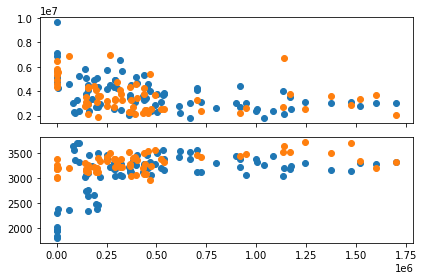

In [52]:
# Question: Describing the affect of new covid cases on AMZN volume and weighted average price:
# Which time offset(s) have the strongest correlation (r-valvue)?

plt.clf()
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.scatter(filtered_volume_df["New Cases"], filtered_volume_df["1_month_future_vol"])
ax1.scatter(filtered_volume_df["New Cases"], filtered_volume_df["7_month_future_vol"])

ax2.scatter(filtered_price_df["New Cases"], filtered_price_df["1_month_future_price"])
ax2.scatter(filtered_price_df["New Cases"], filtered_price_df["7_month_future_price"])

# ax1 = filtered_volume_df.plot(kind='scatter', x='New Cases', y='1_month_future_vol')
# ax1 = filtered_volume_df.plot(kind='scatter', x='New Cases', y='7_month_future_vol')
# ax2 = filtered_volume_df.plot(kind='scatter', x='New Cases', y='1_month_future_vol')
# ax2 = filtered_volume_df.plot(kind='scatter', x='New Cases', y='7_month_future_vol')

plt.tight_layout()
plt.show()

c:\Users\e1317395\Anaconda3\envs\pythondata\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


[ 2.29300184e+06 -1.86588883e-10 -2.29010136e+06]


<Figure size 432x288 with 0 Axes>

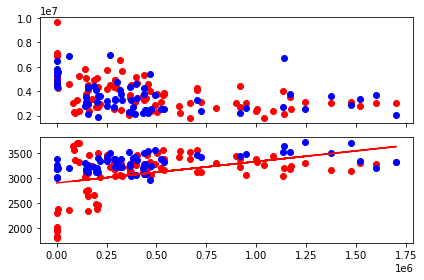

In [57]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

data = filtered_price_df.loc[:,["New Cases","1_month_future_price"]].dropna()
xdata = data["New Cases"]
ydata = data["1_month_future_price"]

popt, pcov = curve_fit(func, xdata, ydata)

print(popt)

plt.clf()
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.scatter(filtered_volume_df["New Cases"], filtered_volume_df["1_month_future_vol"], color = 'r')
ax1.scatter(filtered_volume_df["New Cases"], filtered_volume_df["7_month_future_vol"], color = 'b')

ax2.scatter(filtered_price_df["New Cases"], filtered_price_df["1_month_future_price"], color = 'r')
ax2.scatter(filtered_price_df["New Cases"], filtered_price_df["7_month_future_price"], color = 'b')
ax2.plot(xdata,func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# ax1 = filtered_volume_df.plot(kind='scatter', x='New Cases', y='1_month_future_vol')
# ax1 = filtered_volume_df.plot(kind='scatter', x='New Cases', y='7_month_future_vol')
# ax2 = filtered_volume_df.plot(kind='scatter', x='New Cases', y='1_month_future_vol')
# ax2 = filtered_volume_df.plot(kind='scatter', x='New Cases', y='7_month_future_vol')

plt.tight_layout()
plt.show()

In [ ]:
"""
Notes:
more cases = more uncertainty and less trading
compare correlation of 1 month and 6 month on same axes
side by side of new cases and new deaths, each w/ 1 and 6 month
separate dataframe for price and clean up both, removing unnecessary columns
export both to csvs and give to the team
make figure bigger plt.figsize
second viz could be price vs new cases

limitations: 

idea for Matusola:
volume / new cases ratio over time (line graph) -- does this mean anything?

"""